# Introduccion a Python (2)

Como siempre, empezamos nuestro cuaderno importando las bibliotecas que vamos a usar en el ejercicio.

In [1]:
import os                       # # manejo de funciones del sistema
import sys                      # manejo de funciones del sistema
import pandas as pd             # manejo de dataframes y series
import numpy as np              # funciones de cálculo numérico de la biblioteca `numpy`
import matplotlib.pyplot as plt # funciones específicas de `matplotlib.pyplot`
from scipy.stats import norm    # para hacer la curva de distribución normal
import locale                   # para poner las fechas en formato español

In [2]:
# ajustamos fechas a formato español, el punto y coma evita la impresion de salida de la funcion
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252');

Importamos también las funciones gráficas de la biblioteca `seaborn`y establecemos un estilo por defecto, con el fondo blanco.

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

Es necesario cargar el fichero `camembert.csv` en el espacio de trabajo de Google Colaborate. Para ello, montamos nuestro drive y damos a `Python` el *path* (la direccion de la carpeta).

Una vez cargado, verificamos que existe y hay acceso:

In [4]:
#| eval: false

# 1. Ejecuta esta celda para montar tu Google Drive.
from google.colab import drive
drive.mount('/content/drive')

# 2. Verifica y ajusta esta ruta de archivo si es necesario:
google_drive_path_folder = '/content/drive/MyDrive/Colab Notebooks/master-queseria/datos/'
nombre_archivo_base = 'camembert.csv'
PATH_TO_READ = os.path.join(google_drive_path_folder, nombre_archivo_base)

In [5]:
#| include: false
# CÓDIGO INTERNO PARA QUARTO: Inicialización y corrección de ruta.
import os 

nombre_archivo_base = 'camembert.csv' 
google_drive_path_folder = '/content/drive/MyDrive/Colab Notebooks/master-queseria/datos/'

# Detección de entorno
IS_COLAB = 'google.colab' in sys.modules

# 1. Corrección para Quarto (si no estamos en Colab)
if not IS_COLAB:
    # Si es Quarto, sobrescribimos la ruta con la local.
    PATH_TO_READ = nombre_archivo_base 

# 2. Definir el mensaje de error (Siempre es el de Colab, para el alumno)
ERROR_MESSAGE_HELP = (
    f"El archivo NO SE ENCUENTRA en Google Drive.\n"
    f"1. ¿Ejecutaste la Celda 1 (Montaje de Drive)?\n"
    f"2. ¿Está el archivo 'camembert.csv' exactamente en la ruta que verificaste?: \n{PATH_TO_READ}"
)

Aunque podríamos hacer la lectura del fichero de datos con la instruccion simple,

In [6]:
#| eval: false

df = pd.read_csv(
        PATH_TO_READ, 
        sep = ";", 
        decimal = ",", 
        encoding = 'utf-8' # codificacion usada por Windows
    )

en `Python` siempre se prefiere encapsular la instrucción en una estructura `try...except`, que maneja los posibles errores o **excepciones** que pueden producirse en la lectura, por ejemplo, que nuestro *path* sea incorrecto, o que hayamos escrito mal el nombre del fichero, o cualquier otro error que haga que la instruccion de lectura falle. Añadimos también algunas instrucciones de `print()` que nos ayuden a saber que todo ha ido bien (o mal).

In [7]:
#| echo: true
# ----------------------------------------
# Lectura de datos
# ----------------------------------------

print(f"Intentando leer el archivo desde la ruta: {PATH_TO_READ}\n")

try:
    df = pd.read_csv(
        PATH_TO_READ, 
        sep = ";", 
        decimal = ",", 
        encoding = 'utf-8'
    )
    print("--- LECTURA EXITOSA ---")
    print(f"Filas cargadas: {len(df)}")
    df.head()
    
except FileNotFoundError:
    print("\n--- ERROR DE ARCHIVO ---")
    print(ERROR_MESSAGE_HELP)
        
except Exception as e:
    print("\n--- ERROR AL LEER EL CSV ---")
    print("Ocurrió un error al leer el archivo. Error: {e}")

Intentando leer el archivo desde la ruta: camembert.csv

--- LECTURA EXITOSA ---
Filas cargadas: 211


Ahora convertimos la primera columna, que `pandas` ha leido como texto, en una columna de fecha, y la asignamos como `index` del dataframe. Esto tendrá interés especial cuando usemos las funciones de `pandas`para hacer nuestros gráficos de series; el formateo de series temporales en esta biblioteca es uno de sus puntos más fuertes.

In [8]:
df['fecha']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha',inplace=True)
df.sort_index(inplace=True)

Podemos mostrar el `dataframe` que hemos leído, mediante la funcion `.head()`, que nos muestra las cinco primeras lineas.

In [9]:
df.head()

,fabricacion,est,mg,ph,cloruros,coliformes
fecha,,,,,,
2020-01-02,1,46.22,23.0,4.61,1.88,0.0
2020-01-03,1,45.28,23.0,4.78,1.62,0.0
2020-01-06,1,45.11,23.0,4.72,1.69,2000.0
2020-01-08,1,49.05,23.5,4.68,1.65,6000.0
2020-01-09,1,47.82,25.0,4.66,1.37,100.0


Vemos que el nombre de la columna `fecha` está colocada en una línea inferior respecto a los otros nombres de columna. Esto se debe a que la hemos designado como `ìndex`, y, por lo tanto, ya no es una columna ordinaria para `pandas` (podemos volver a convertirla en columna normal o de texto en cualquier momento según nuestros intereses, como veremos más adelante).

También podemos usar la función `.info()`, que nos dice la estructura interna de nuestro `dataframe` y el tipo de los datos (entero, numérico, carácter...). Dado que la fecha, como hemos visto, está formateada como fecha y asignada como `ìndex`, ya no aparece en el listado de columnas de datos, sino que aparece en la primera línea como `DateTimeIndex`, y la informacion nos dice los límites de esas fechas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-01-02 to 2020-12-29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fabricacion  211 non-null    int64  
 1   est          211 non-null    float64
 2   mg           211 non-null    float64
 3   ph           211 non-null    float64
 4   cloruros     211 non-null    float64
 5   coliformes   210 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 11.5 KB


Una vez leído correctamente el `DataFrame`, podemos hacer algunos gráficos de sus columnas numéricas. También usaremos las funciones de `seaborn` que producen salidas muy atractivas y son funcionjes fáciles de manejar.

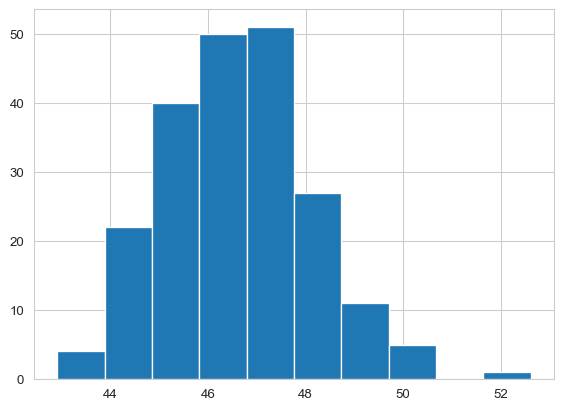

In [11]:
df["est"].hist() # histograma bássico de matplotlib

plt.show()

Fíjate en la forma correcta de designar una columna en un `DataFrame`de pandas, usando su nombre.

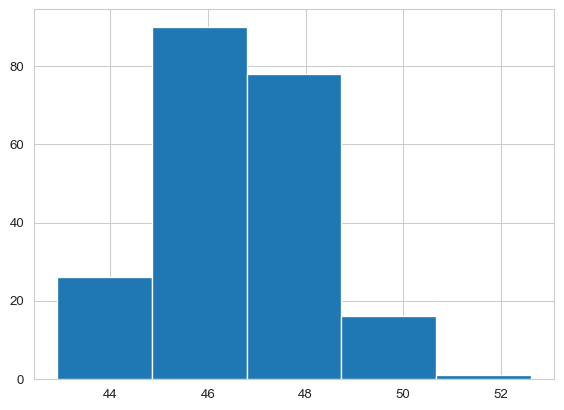

In [12]:
df["est"].hist(bins = 5)

plt.show()

Vamos a repetir el histograma con `seaborn`, que nos permite incluir una **curva de densidad** fácilmente (pregunta: ¿qué es una curva de densidad?)

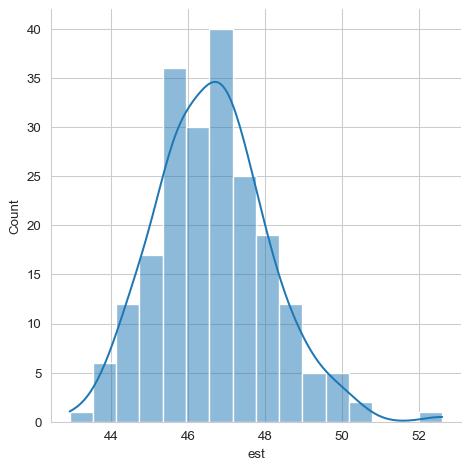

In [13]:
sns.displot(df["est"], kde = True)

plt.show()

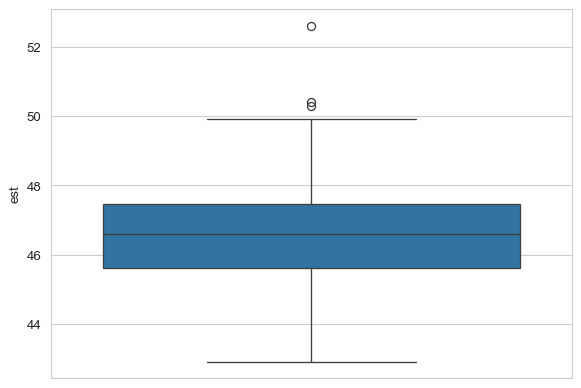

In [14]:
sns.boxplot(df['est'])

plt.show()

Aquí puedes ver la potencia de `pandas`paramanejar y agrupar las series. Para representar los datos por mes, sólo tenemos que crear una nueva columna `mes` indicando a `pandas` que extraiga del índice la parte de fecha que corresponde al mes. ¿Fácil, no?

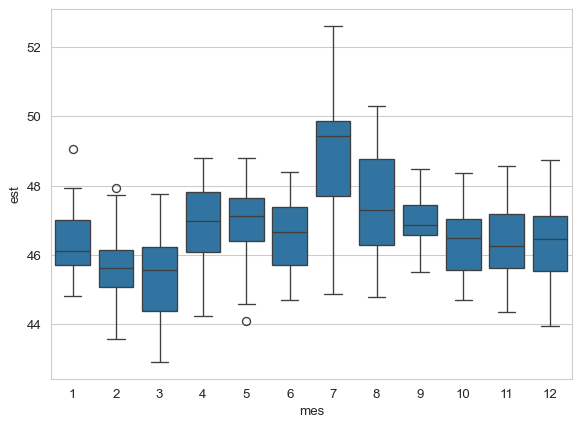

In [15]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='est', data=df)

plt.show()

En vez de usar el número para el mes, podemos usar el código de letras abreviado (en este caso, `seaborn`utiliza la abreviatura en inglés, pero hemos cambiado la codificación para que lo represente en español, en la instruccion `locale` que hemos usado en la primera casilla). Aprovechamos para personalizar un poco el gráfico.

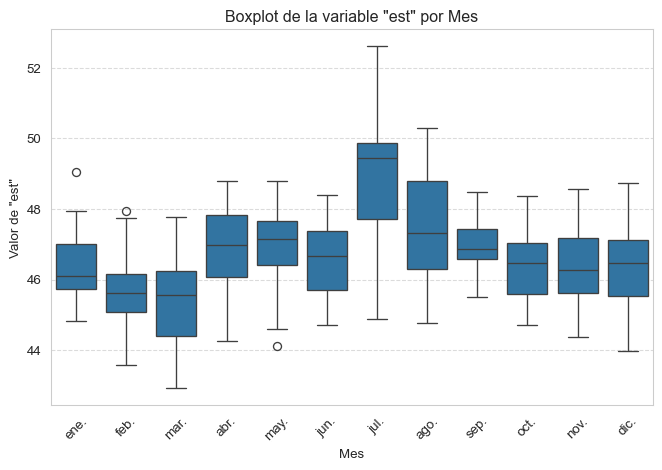

In [16]:
df['mes_abreviado'] = df.index.strftime('%b')
sns.boxplot(x='mes_abreviado', y='est', data=df)
# Opcional: Personalizar el gráfico
plt.title('Boxplot de la variable "est" por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor de "est"')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para mejor lectura
plt.xticks(rotation=45) # Rotar las etiquetas del eje X si son muchas
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado

plt.show()


La función `.plot()` nos representa los valores de la columna en orden secuencial:

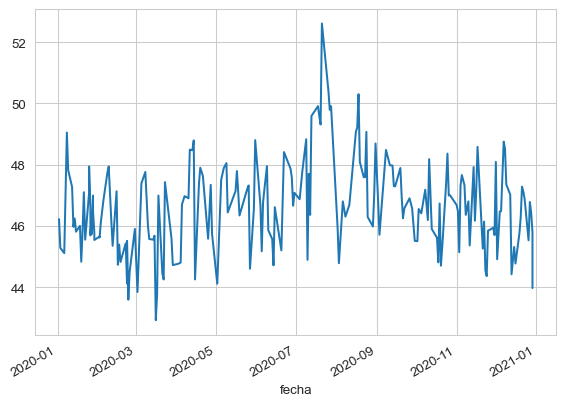

In [17]:
df["est"].plot()
plt.show()

Si utilizamos las funciones de `pandas`, podemos reformatear las fechas como serie temporal. Creamos una serie temporal y la remuestreamos para hacer las medias semanales del extracto seco total, eliminando las semans en las que no hay valores con `.dropna()`. La función `resample('W-MON')` formatea las fechas para que las semanas empiecen en lunes, como es el caso en Europa (en USA la semana empieza el domingo). Aprovechamos para mostrar una de las potencias de `Python`: podemos hacer que varios cálculos se hagan a continuacion de los otros, simplemente enlazando las funciones, hasta el `.plot()`

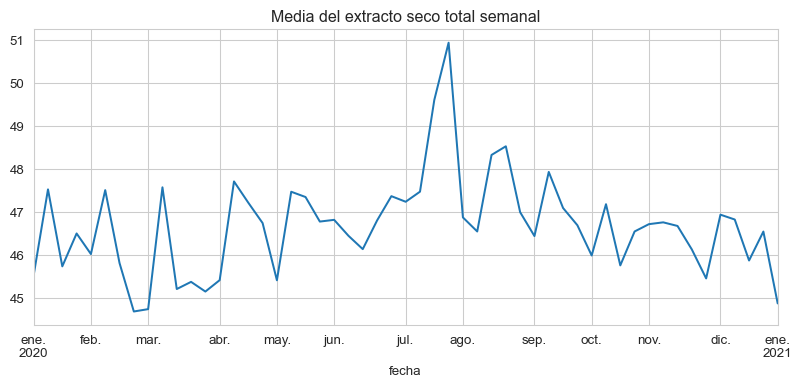

In [18]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["est"].dropna())
ts.resample('W-MON').mean().plot(title="Media del extracto seco total semanal")
plt.show()

Veamos a continuación otras formas de formatear la serie sobre la marcha, pero esta vez representando la `desviación típica`en vez de la `media`.

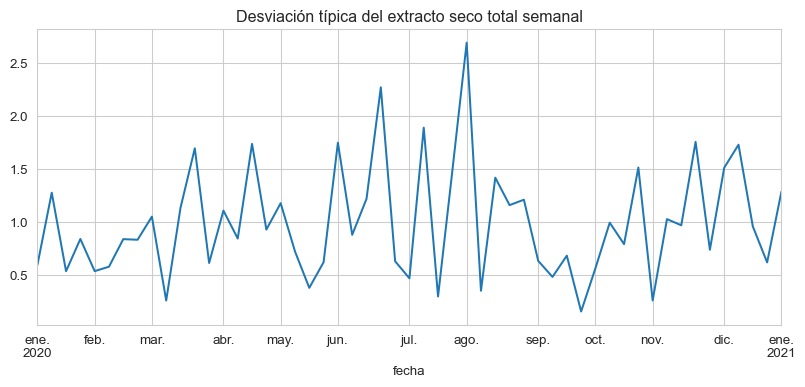

In [19]:
ts.resample('W-MON').std().plot(title="Desviación típica del extracto seco total semanal");

O podemos representar un período específico de la serie indicando a `pandas` los límites inferior y superior de las fechas que queremos.

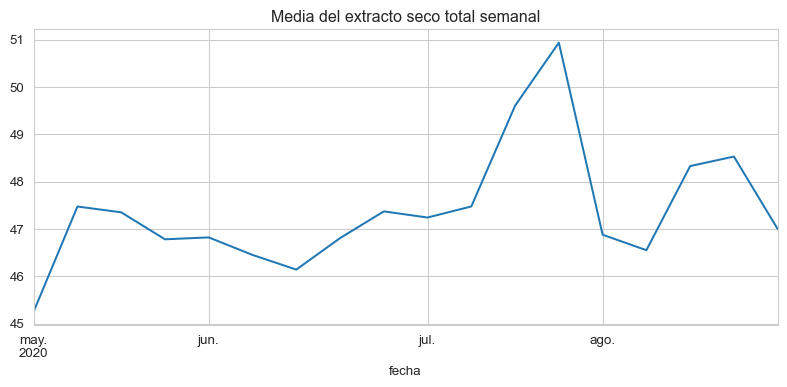

In [20]:
ts["2020-05":"2020-08"].resample('W-MON').mean().plot(title="Media del extracto seco total semanal");

A modo ilustrativo, aunque sin un interés prioritario, muestro un grafico `jointplot()` de `seaborn` que muestra la facilidad con la que esta biblioteca puede hacer un gráfico complejo de dispersión e histograma simultáneamente.

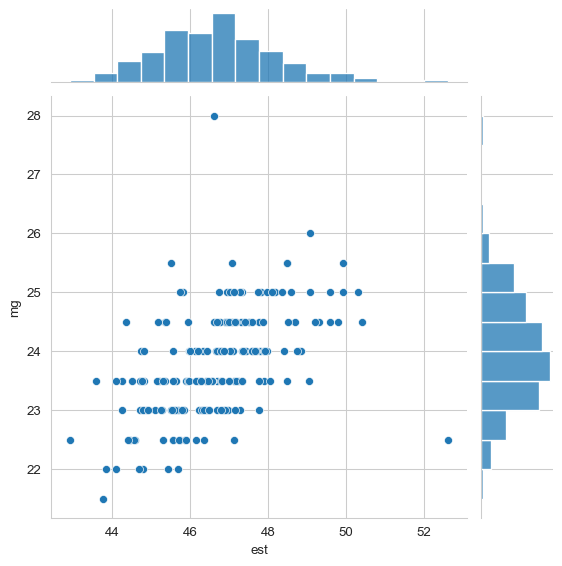

In [21]:
sns.jointplot(x="est", y="mg", data = df[~df.index.duplicated(keep='first')])

Una alternativa más moderna a los `boxplots` son los llamados `violin plots`, que tienenla ventaja sobrelos primeros de mostrar la curva de distribución de los datos.

<Axes: xlabel='fecha', ylabel='est'>

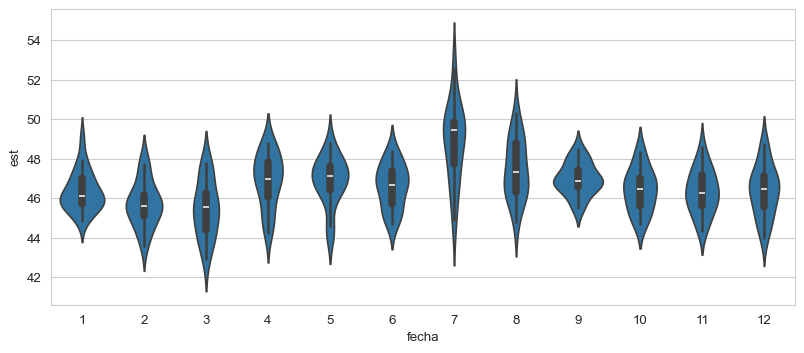

In [22]:
sns.violinplot(y=df["est"], x=df.index.month)

Finalmente, una serie de cálculos más complejos para obtener los gráficos de capacidad de un proceso, como muestra de cómo se pueden usar las funciones y gráficos de `Python` para prácticamente cualquier necesidad.

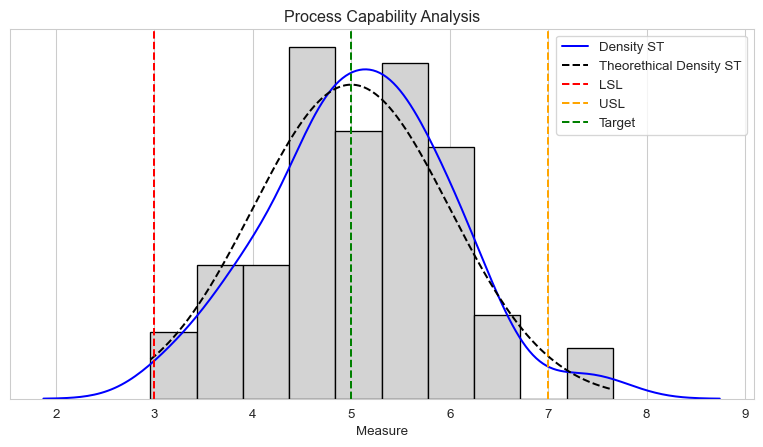

In [23]:
# codigo de Roberto Salazar
# https://medium.com/geekculture/process-capability-analysis-with-python-a0f3aed8e578

# Set specification limits
target = 5
LSL = 3
USL = 7

# Generate normally distributed data points
data = np.random.normal(loc=target,scale=1,size=100)


# Generate probability density function
x = np.linspace(min(data), max(data), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(10,5))
plt.hist(data, color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(data, color="blue", label="Density ST")
plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL, linestyle="--", color="red", label="LSL")
plt.axvline(USL, linestyle="--", color="orange", label="USL")
plt.axvline(target, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [24]:
# Calculate Cp
Cp = (USL-LSL)/(6*np.std(data))

# Calculate Cpk
Cpk = min((USL-data.mean())/(3*data.std()), (data.mean()-LSL)/(3*data.std()))

# Calculate z-value
z = min((USL-data.mean())/(data.std()), (data.mean()-LSL)/(data.std()))

# Get data summary statistics
num_samples = len(data)
sample_mean = data.mean()
sample_std = data.std()
sample_max = data.max()
sample_min = data.min()
sample_median = np.median(data)

# Get percentage of data points outside of specification limits
pct_below_LSL = len(data[data < LSL])/len(data)*100
pct_above_USL = len(data[data > USL])/len(data)*100

# """ # Write .txt file with results
# with open('/content/process_results.txt', "w") as results:
#     results.write("PROCESS CAPABILITY ANALYSIS\n")

#     results.write("-----------------------------------\n")
#     results.write(f"Specifications\n")
#     results.write(f"\nTarget: {target}\n")
#     results.write(f"LSL: {LSL}\n")
#     results.write(f"USL: {USL}\n")

#     results.write("-----------------------------------\n")
#     results.write(f"Indices\n")
#     results.write(f"\nCp: {round(Cp,2)}\n")
#     results.write(f"Cpk: {round(Cpk,2)}\n")
#     results.write(f"z: {round(z,2)}\n")

#     results.write("-----------------------------------\n")
#     results.write(f"Summary Statistics\n")
#     results.write(f"\nNumber of samples: {round(num_samples,2)}\n")
#     results.write(f"Sample mean: {round(sample_mean,2)}\n")
#     results.write(f"Sample std: {round(sample_std,2)}\n")
#     results.write(f"Sample max: {round(sample_max,2)}\n")
#     results.write(f"Sample min: {round(sample_min,2)}\n")
#     results.write(f"Sample median: {round(sample_median,2)}\n")

#     results.write(f"Percentage of data points below LSL: {round(pct_below_LSL,2)}%\n")
#     results.write(f"Percentage of data points above USL: {round(pct_above_USL,2)}%\n") """

ver https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

A continuación, una serie de celdas que realizan gráficos diversos, puedes dedicar un rato a estudiarlas e intentar comprender bien su programación.

In [25]:
limite_rechazo = 231    ##
limite_deficientes = 242    ##

LSL = df.est.mean() - 3 * df.est.std()    ## lower specification limit
USL = df.est.mean() + 3 * df.est.std()    ## upper specification limit

df.insert(6,'LSL', LSL)
df.insert(7,'USL', USL)


In [26]:
df['fecha'] = df.index

In [27]:
df.head()

,fabricacion,est,mg,ph,cloruros,coliformes,LSL,USL,mes,mes_abreviado,fecha
fecha,,,,,,,,,,,
2020-01-02,1,46.22,23.0,4.61,1.88,0.0,42.279767,50.994641,1,ene.,2020-01-02
2020-01-03,1,45.28,23.0,4.78,1.62,0.0,42.279767,50.994641,1,ene.,2020-01-03
2020-01-06,1,45.11,23.0,4.72,1.69,2000.0,42.279767,50.994641,1,ene.,2020-01-06
2020-01-08,1,49.05,23.5,4.68,1.65,6000.0,42.279767,50.994641,1,ene.,2020-01-08
2020-01-09,1,47.82,25.0,4.66,1.37,100.0,42.279767,50.994641,1,ene.,2020-01-09


In [28]:
df2 = pd.melt(df, id_vars= ['fecha'], value_vars=["est","LSL", "USL"],  value_name="valores")

In [29]:
df2.head()

,fecha,variable,valores
0,2020-01-02,est,46.22
1,2020-01-03,est,45.28
2,2020-01-06,est,45.11
3,2020-01-08,est,49.05
4,2020-01-09,est,47.82


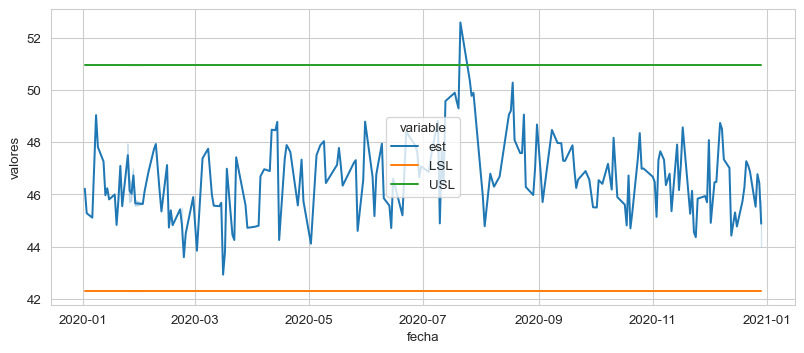

In [30]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
g = sns.lineplot(data=df2, x="fecha", y="valores", hue="variable")

In [31]:
df3 = df2.groupby([df2['fecha'].dt.isocalendar().week, "variable"]).mean()

In [32]:
df3.reset_index(inplace=True)

In [33]:
df3.head()

,week,variable,fecha,valores
0,1,LSL,2020-01-02 12:00:00,42.279767
1,1,USL,2020-01-02 12:00:00,50.994641
2,1,est,2020-01-02 12:00:00,45.750000
3,2,LSL,2020-01-08 18:00:00,42.279767
4,2,USL,2020-01-08 18:00:00,50.994641


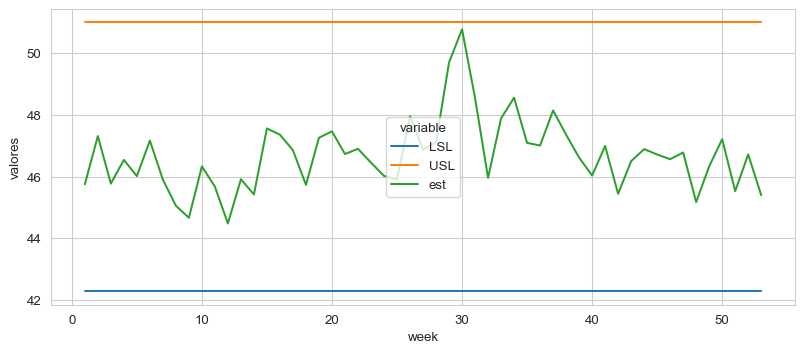

In [34]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
sns.set_style("whitegrid")
g = sns.lineplot(data=df3, x="week", y="valores", hue="variable")

In [35]:
df = pd.read_csv("camembert.csv" , decimal = ",", sep=";")
df['fecha']= pd.DatetimeIndex(df.fecha).normalize()
df.drop(['fabricacion','mg', 'cloruros','coliformes'], axis=1, inplace = True)

In [36]:
df2 = df['est'].groupby(df['fecha'].dt.isocalendar().week).agg(['mean','std'])


In [37]:
df2.head()

,mean,std
week,,
1,45.7500,0.664680
2,47.3125,1.646134
3,45.7700,0.547494
4,46.5400,0.893476
5,46.0150,0.522986


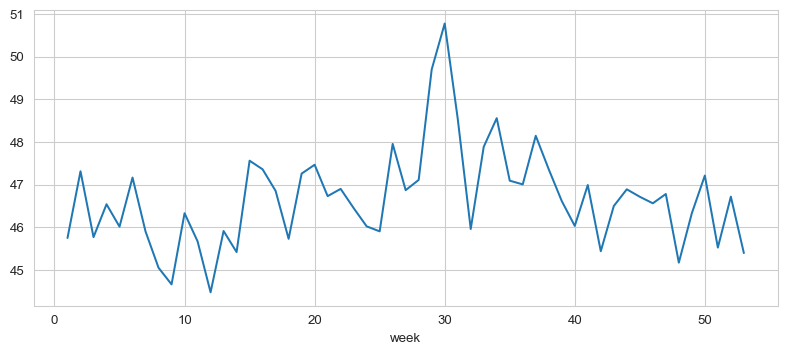

In [38]:
df2['mean'].plot();

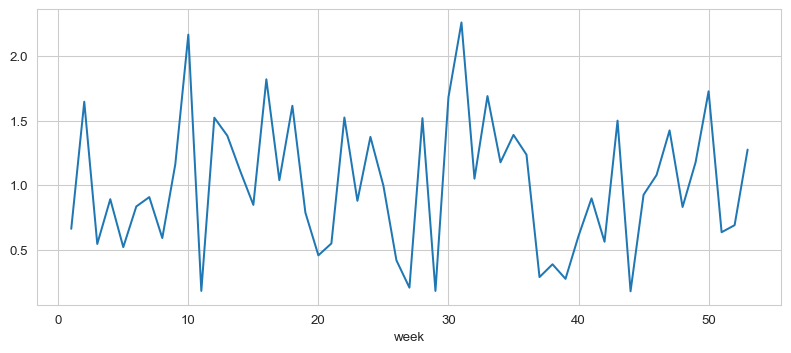

In [39]:
df2['std'].plot();

In [40]:
LSL = df2['mean'] - 3 * df2['std']    ## lower specification limit
USL = df2['mean'] + 3 * df2['std']    ## upper specification limit

df2.insert(2,'LSL', LSL)
df2.insert(3,'USL', USL)

# limite_rechazo = 231    ##
# limite_deficientes = 242    ##
# df3.insert(5,'rechazo', limite_rechazo)
# df3.insert(6,'deficientes', limite_deficientes)


In [41]:
df2.head()

,mean,std,LSL,USL
week,,,,
1,45.7500,0.664680,43.755959,47.744041
2,47.3125,1.646134,42.374097,52.250903
3,45.7700,0.547494,44.127517,47.412483
4,46.5400,0.893476,43.859571,49.220429
5,46.0150,0.522986,44.446042,47.583958


In [42]:
df2['semana'] = df2.index # necesitamos la semana en una columna de valor
df3 = pd.melt(df2, id_vars= ['semana'], value_vars=["mean","LSL", "USL"],  value_name="valores")

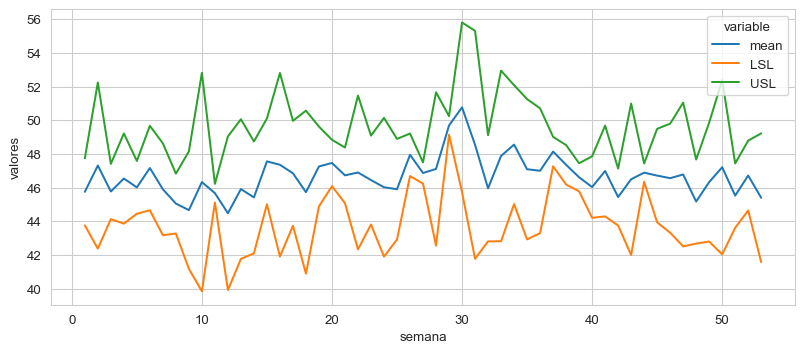

In [43]:
g = sns.lineplot(data=df3, x="semana", y="valores", hue="variable")